# 聚类 

## 聚类概述

对于有标签的数据，我们进行有监督学习，常见的分类任务就是监督学习；而对于无标签的数据，我们希望发现无标签的数据中的潜在信息，这就是无监督学习。聚类，就是无监督学习的一种，它的概念是：将相似的对象归到同一个簇中，使得同一个簇内的数据对象的相似性尽可能大，同时不在同一个簇中的数据对象的差异性也尽可能地大。即聚类后同一类的数据尽可能聚集到一起，不同数据尽量分离。

<img src=img/clusters.png style=width:60%>

依据算法原理，聚类算法可以分为基于划分的聚类算法（比如 K-means）、基于密度的聚类算法（比如DBSCAN）、基于层次的聚类算法（比如HC）和基于模型的聚类算法（比如GMM）。

## 相似度

相似度衡量两个对象的相似程度，有基于距离的相似度，距离越近，相似度越高，比如欧氏距离；有基于夹角的相似度，夹角越小，相似度越高，比如余弦相似度。

## 距离

令 $\boldsymbol{x} = (x_1, x_2, \cdots, x_n) \in \mathbb{R}^n$ 和 
令 $\boldsymbol{y} = (y_1, y_2, \cdots, y_n) \in \mathbb{R}^n$ 表示两个人点，其 $\boldsymbol{x}$ 和 $\boldsymbol{y}$的闵可夫斯基距离（Minkowski distance）定义为
$$
d(\boldsymbol{x}, \boldsymbol{y}) = \Big(\sum_{i=0}^n(y_i - x_i)^p\Big)^{\frac{1}{p}}
$$

当 $p=1$ 时，称为曼哈顿距离（Manhattan distance）
$$
d(\boldsymbol{x}, \boldsymbol{y}) = \sum_{i=0}^n |y_i - x_i|
$$

当 $p=2$ 时，称为欧式距离（Euclidean distance）。
$$
d(\boldsymbol{x}, \boldsymbol{y}) = ||\boldsymbol{x} - \boldsymbol{y}|| = \sqrt{\sum_{i=0}^n|y_i - x_i|^2}
$$

## K-means

1967年，J. MacQueen 在论文 `"Some methods for classification and analysis of multivariate observations"`中正式提出术语`K-means`。

`K-means`算法将样本集 $ D = \{{x}^{(1)}, {x}^{(2)}, \cdots, {x}^{(m)}\}$ 划分为 $K$ 个不相交的簇 $C = \{C_1, C_2, \cdots, C_K \}$，使得簇内平方和(within-cluster sum-of-squares)最小，即最小化
$$
\sum_{k=1}^K \sum_{\boldsymbol{x} \in C_k} || \boldsymbol{x}-\boldsymbol{\mu}_k ||
$$
其中 $ \boldsymbol{\mu}_k $是簇 $C_k$的均值，通常被称为簇的“质心”(`"centroids"`)。

`K-means` 计算上并不容易，是一个 NP 问题。所以一般采用启发式贪心策略，通过迭代收敛到局部最优解。最初的实现方法是Lloyd-Forgy方法(1957/1965)，后来提出了更高效的`Hartigan-Wong`算法(1975/1979)。

***
K-means的本质是物以类聚，人以群分。
***

### K-means迭代算法
输入：样本集 $D$，聚类的簇数$K$

输出：簇划分 $C = \{C_1, C_2, \cdots, C_K \}$.
1. 随机选取 $K$ 个点作为初始的质心 $\{\boldsymbol{\mu}_1, \boldsymbol{\mu}_2, \cdots, \boldsymbol{\mu}_K\}$。

2. 计算每个样本点与 $K$ 个中心点的 $K$ 个距离 $d_{ij} = ||\boldsymbol{x}^{(i)} - \boldsymbol{\mu}_j||_2$ （假如有 $N$ 个点，就有 $N*K$ 个距离值）。

3. 将样本点分配到最近的中心点的簇中，并重新计算每个簇的中心点。

4. 重复步骤2和步骤3。

5. 直到达到收敛或者达到某个停止阈值(如最大计算时间)。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def kmeans(X, k, epoches=10):
    # 随机选K个点作为初始质心
    centroids = X[np.random.randint(0, X.shape[0], k)]

    for _ in range(epoches):
        # 计算样本点到各质心的距离
        dist = np.linalg.norm(X - centroids.reshape(k, 1, -1), axis=2).T

        # 分配到最近的簇中
        y_pred = np.argmin(dist, axis=1)

        # 更新质心
        centroids = np.array([X[y_pred==i, :].mean(axis=0) for i in range(k)])
    
    return y_pred, centroids

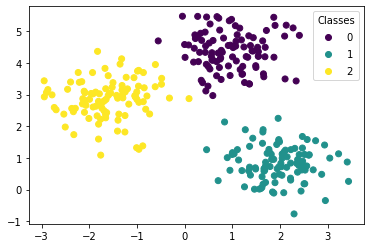

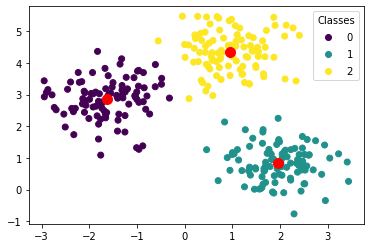

In [3]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)
y_pred, centroids = kmeans(X, 3, epoches=100)

plt.figure()
ax = plt.scatter(X[:, 0], X[:, 1], c=y_true)
plt.legend(*ax.legend_elements(), loc="upper right", title="Classes")

plt.figure()
ax = plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.legend(*ax.legend_elements(), loc="upper right", title="Classes")
plt.scatter(centroids[:, 0], centroids[:, 1], c="r", s=100)

In [4]:
print(y_true)
print(y_pred)

[0 1 0 2 2 2 1 0 2 2 1 1 1 0 1 2 0 0 2 1 2 0 1 0 2 2 0 2 1 1 2 0 0 1 1 2 1
 2 0 1 2 1 0 1 1 2 1 2 2 1 2 1 2 2 1 0 0 2 2 0 1 1 0 2 1 2 0 1 0 1 2 2 2 2
 1 0 1 2 0 0 2 0 1 0 0 0 1 2 0 0 2 1 2 0 1 1 0 1 2 0 1 2 0 1 0 0 2 0 1 1 0
 2 0 0 2 2 0 0 1 1 1 2 1 1 1 2 1 1 1 2 2 2 0 2 2 1 2 0 2 2 1 0 1 0 2 2 0 2
 2 1 0 2 0 1 2 2 1 1 0 1 0 0 1 0 2 0 0 0 0 2 1 0 2 1 1 1 0 1 0 0 1 2 0 0 0
 0 1 2 0 2 0 0 1 1 2 0 1 2 0 2 1 2 0 2 1 2 0 2 0 1 0 0 2 1 1 1 1 0 2 1 0 1
 1 1 0 2 2 0 0 2 0 1 1 0 1 2 2 2 0 0 1 2 2 2 2 1 2 2 0 1 1 0 1 1 2 0 1 2 0
 0 2 0 2 2 0 2 0 1 1 1 1 0 0 0 0 0 2 2 1 0 0 1 1 1 2 1 2 2 1 1 2 2 2 1 0 0
 2 1 0 2]
[2 1 2 0 0 0 1 2 0 0 1 1 1 2 1 0 2 2 0 1 0 2 1 2 0 0 2 0 1 1 0 2 2 1 1 0 1
 0 2 1 0 1 2 1 1 0 1 0 0 1 0 1 0 0 1 2 2 0 0 2 1 1 2 0 1 0 2 1 2 1 0 0 0 0
 1 2 1 0 2 2 0 2 1 2 2 2 1 0 2 2 0 1 0 2 1 1 2 1 0 2 1 0 2 1 2 2 0 2 1 1 2
 0 2 2 0 0 2 2 1 1 1 0 1 1 1 0 1 1 1 0 0 0 2 0 0 1 0 2 0 0 1 2 1 2 0 0 2 0
 0 1 2 0 2 1 0 0 1 1 2 1 2 2 1 2 0 2 2 2 2 0 1 2 0 1 1 1 2 1 2 2 1 0 2 2 2
 2 1 0 2 0 2 2 

### 如何评估聚类效果

实际应用中，把 SSE（Sum of Squared Errors，误差平方和）与轮廓系数（Silhouette Coefficient）结合使用，评估聚类模型的效果。

误差评分和

$$
\operatorname{SSE}(C)=\sum_{k=1}^K \sum_{x_i \in C_k}|x_i-\mu_k |^2
$$

轮廓系数由两部分组成：
- $a_i$：样本点到同一簇中样本点的平均距离（凝聚度） 
- $b_i$: 样本点到最近簇中样本点的评价距离（分离度）
  
每一个样本点的轮廓系数定义为：
$$
S_i = \frac{b_i-a_i}{\max(a_i, b_i)}
$$

数据集的轮廓系数
$$
S = \frac{1}{m} \sum_{i=1}^m S_i
$$

`K-means`算法的缺点：

- 其前提假设集群是凸(convex )的并且各向同性(isotropic)，但并非总是如此。它对细长的簇或形状不规则的流形反应很差。（DBSCAN算法)

- 选择合适的 $K$ 值是困难的。一般通过尝试或者先验知识来确定。(ISODATA算法)

- 对初始中心点选择敏感。(K-means++算法)

- 对噪声和异常点敏感。（K-mediods算法)

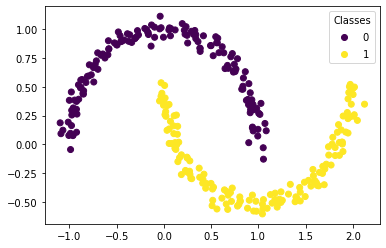

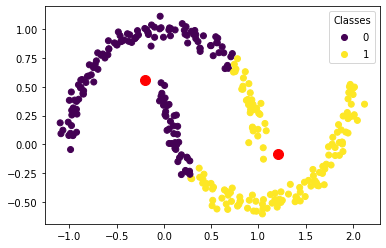

In [5]:
from sklearn.datasets import make_moons
X, y_true = make_moons(n_samples=300, noise=0.05, random_state=0)
y_pred, centroids = kmeans(X, 2, epoches=100)

plt.figure()
ax = plt.scatter(X[:, 0], X[:, 1], c=y_true)
plt.legend(*ax.legend_elements(), loc="upper right", title="Classes")

plt.figure()
ax = plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.legend(*ax.legend_elements(), loc="upper right", title="Classes")
plt.scatter(centroids[:, 0], centroids[:, 1], c="r", s=100)

### DBSCAN算法

DBSCAN(Density-Based Spatial Clustering of Applications with Noise)是一基于密度的聚类算法，DBSCAN将簇定义为密度相连的点的最大集合，能够把具有足够高密度的区域划分为簇，并可在噪声的空间数据库中发现任意形状的聚类。

### 基本定义
DBSCAN是基于一组邻域来描述样本集$ D = \{{x}^{(1)}, {x}^{(2)}, \cdots, {x}^{(m)}\}$的紧密程度的，参数 $(\epsilon, minPts)$ 用来描述邻域的样本分布紧密程度。其中，$\epsilon$ 描述了某一样本点的邻域距离阈值（半径），$minPts$ 描述了样本点半径为 $\epsilon$ 的邻域中样本点个数的最小个数。下面是与密度聚类相关的定义：

- $\epsilon$-邻域：对于 $x^{(i)} \in D$，其 $\epsilon$-邻域包含样本集$D$中与 $ x^{(i)} $ 的距离不大于$\epsilon$的子样本集，记为 $N_\epsilon(x^{(i)})$。
  
- 核心对象：对于任一样本 $x^{(i)} \in D$ ，如果其 $\epsilon$-邻域对应的$N_\epsilon(x^{(i)}$至少包含$minPts$个样本，即如果$|N_\epsilon(x^{(i)}| > minPts$，则$ x^{(i)} $是核心对象。
  
- 密度直达：如果 $ x^{(j)} $ 位于 $ x^{(i)} $ 的  $\epsilon$-邻域中，且 $ x^{(i)} $  是核心对象，则称 $ x^{(j)} $ 由 $ x^{(i)} $ 密度直达。反之不一定成立，即此时不能说 $ x^{(i)} $ 由 $ x^{(j)} $ 密度直达, 除非  也是核心对象，即密度直达不满足对称性。
  
- 密度可达：对于 $ x^{(i)} $ 和 $ x^{(j)} $，如果$ x^{(i)} $能够经过一系列核心对象到达$ x^{(j)} $，则称$ x^{(j)} $ 由 $ x^{(i)} $密度可达。也就是说，密度可达满足传递性。密度可达也不满足对称性，这个可以由密度直达的不对称性得出。
  
- 密度相连：对于 $ x^{(i)} $ 和 $ x^{(j)} $，如果存在核心对象样本$ x^{(k)} $，使 $ x^{(i)} $ 和 $ x^{(j)} $ 均由 $ x^{(k)} $ 密度可达，则称 $ x^{(i)} $ 和 $ x^{(j)}$ 密度相连。密度相连关系满足对称性。

![](https://www.researchgate.net/publication/342141592/figure/fig4/AS:901775972380681@1592011554293/An-Example-Illustrating-the-Density-Based-DBSCAN-Clustering-Method-Applied-to-SMLM-Data.png)

### DBSCAN
DBSCAN的聚类定义很简单： 由密度可达关系导出的最大密度相连的样本集合，即为我们最终聚类的一个类别，或者说一个簇。（注意是密度相连的集合），簇里面可以有一个或者多个核心对象。如果只有一个核心对象，则簇里其他的非核心对象样本都在这个核心对象的$\epsilon$-邻域里；如果有多个核心对象，则簇里的任意一个核心对象的 $\epsilon$-邻域中一定有一个其他的核心对象，否则这两个核心对象无法密度可达。这些核心对象的  $\epsilon$-邻域里所有的样本的集合组成的一个DBSCAN聚类簇。

那么怎么才能找到这样的簇样本集合呢？DBSCAN使用的方法很简单，它任意选择一个没有类别的核心对象作为种子，然后找到所有这个核心对象能够密度可达的样本集合，即为一个聚类簇。接着继续选择另一个没有类别的核心对象去寻找密度可达的样本集合，这样就得到另一个聚类簇 （这样的得到都肯定是密度相连的）。一直运行到所有核心对象都有类别为止。

- 异常点问题：一些异常样本点或者说少量游离于簇外的样本点，这些点不在任何一个核心对象在周围，在`DBSCAN`中，我们一般将这些样本点标记为噪音点。
  
- 距离度量问题：即如何计算某样本和核心对象样本的距离。在 `DBSCAN` 中，一般采用最近邻思想，采用某一种距离度量来衡量样本距离，比如欧式距离、曼哈顿距离等。
  
- 数据点优先级分配问题：例如某些样本可能到两个核心对象的距离都小于 $\epsilon$，但是这两个核心对象由于不是密度直达，又不属于同一个聚类簇，那么如果界定这个样本的类别呢？一般来说，此时 `DBSCAN` 采用先来后到，先进行聚类的类别簇会标记这个样本为它的类别。也就是说`DBSCAN`的算法不是完全稳定的算法。

DBSCAN算法流程

输入：样本集 $D$  ，邻域参数 $(\epsilon, minPts)$。

输出：簇划分 $C = \{C_1, C_2, \cdots, C_K \}$。

1. 初始化未访问对象集合 $\Gamma = D$ ，初始化类别 $k = -1$。

2. 遍历 $\Gamma$ 的元素。$\Gamma$中随机选择一个样本 $p$，并将 $p$ 从 $\Gamma$ 中移除。

3. 计算 $p$ 的邻域 $N_\epsilon(p)$。

4. 如果 $|N_\epsilon(p)| \ge minPts$，则类别 $k = k+1$，并将 $p$ 的类别设为 $k$。同时遍历 $ p_i \in N_\epsilon(p) $。否则跳到第5步。

    a. 如果 $p_i \in \Gamma$，计算 $p_i$ 的邻域 $N_\epsilon(p_i)$，并将 $p_i$ 从 $\Gamma$ 中移除。

    b. 如果 $|N_\epsilon(p_i)| \ge minPts$，则更新 $p$ 的领域，即 $N_\epsilon(p) =  N_\epsilon(p) \cup N_\epsilon(p_i) $。

    c. 检查 $p_i$ 是否已分配类别，如果没有，则设置为 $k$。

5. 如果 $\Gamma = \emptyset$，则结束，否则跳到第2步。
   



In [6]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


def dbscan(X, eps, min_pts):

    def get_neighbors(p):
        return np.where(np.linalg.norm(X - X[p, :], axis=1) < eps)[0].tolist()

    m = X.shape[0]  # 样本数量
    unvisited = list(range(m))
    # y_pred为输出结果, 表示对应元素所属类别
    # 初始化为-1, 表示噪点
    y_pred = np.full(m, -1)
    k = -1  # 用k标记簇号, 如果是-1表示是噪声点
    while unvisited:  # 只要还有没有被访问的点就继续循环
        p = random.choice(unvisited)  # 随机选择一个未被访问对象
        unvisited.remove(p)
        neighbors = get_neighbors(p)

        # 如果邻域内对象个数大于min_pts说明是一个核心对象
        if len(neighbors) >= min_pts:
            k = k+1
            y_pred[p] = k  # 表示p它属于k这个簇

            for pi in neighbors:  # 现在要找该邻域内密度可达
                if pi in unvisited:
                    unvisited.remove(pi)
                    # nighbor_pi是pi的eps邻域对象集合
                    nighbor_pi = get_neighbors(pi)
                    # pi是否是核心对象, 通过他的密度直接可达产生p的密度可达
                    # 如果pi是核心, 则将其邻域并入p的邻域
                    if len(nighbor_pi) >= min_pts:
                        neighbors.extend(list(set(nighbor_pi) - set(neighbors)))
                
                if y_pred[pi] == -1:  # pi不属于任何一个簇, 说明第pi个值未改动
                    y_pred[pi] = k

        else:
            y_pred[p] = -1  # 噪声点
    return y_pred


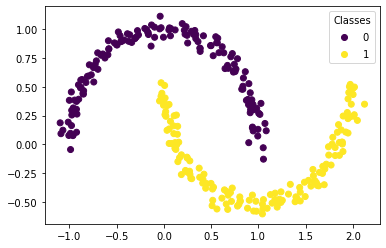

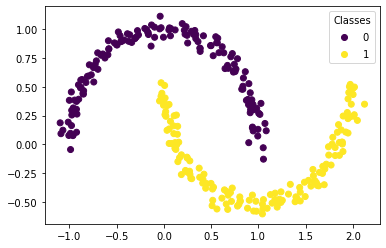

In [7]:
from sklearn.datasets import make_moons
X, y_true = make_moons(n_samples=300, noise=0.05, random_state=0)
y_pred = dbscan(X, 0.3, 10)

plt.figure()
ax = plt.scatter(X[:, 0], X[:, 1], c=y_true)
plt.legend(*ax.legend_elements(), loc="upper right", title="Classes")

plt.figure()
ax = plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.legend(*ax.legend_elements(), loc="upper right", title="Classes")


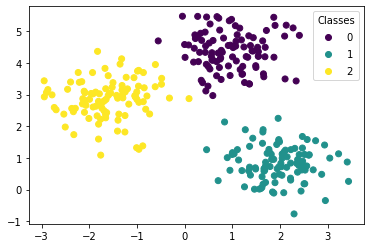

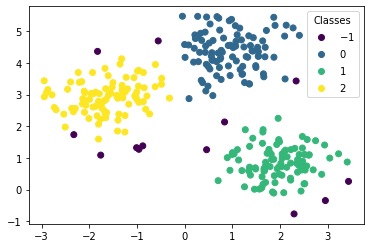

In [8]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)
y_pred = dbscan(X, eps=0.5, min_pts=6)

plt.figure()
ax = plt.scatter(X[:, 0], X[:, 1], c=y_true)
plt.legend(*ax.legend_elements(), loc="upper right", title="Classes")

plt.figure()
ax = plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.legend(*ax.legend_elements(), loc="upper right", title="Classes")


## sklearn 聚类

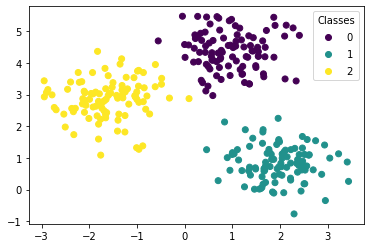

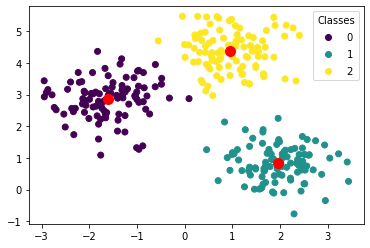

In [9]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)
km = KMeans(n_clusters=3, random_state=0).fit(X)
y_pred, centroids = km.labels_, km.cluster_centers_


plt.figure()
ax = plt.scatter(X[:, 0], X[:, 1], c=y_true)
plt.legend(*ax.legend_elements(), loc="upper right", title="Classes")

plt.figure()
ax = plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.legend(*ax.legend_elements(), loc="upper right", title="Classes")
plt.scatter(centroids[:, 0], centroids[:, 1], c="r", s=100)

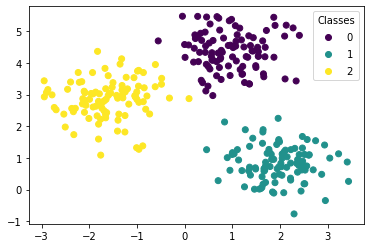

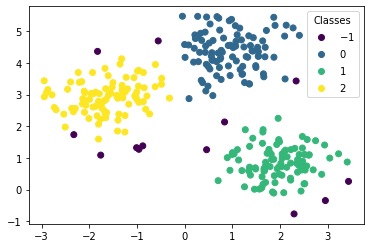

In [10]:
from sklearn.cluster import DBSCAN

X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)
db = DBSCAN(eps=0.5, min_samples=6).fit(X)
y_pred = db.labels_

plt.figure()
ax = plt.scatter(X[:, 0], X[:, 1], c=y_true)
plt.legend(*ax.legend_elements(), loc="upper right", title="Classes")

plt.figure()
ax = plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.legend(*ax.legend_elements(), loc="upper right", title="Classes")